## **What is the most optimal skill to learn for Data Analysts?**

In [8]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import plotly.express as px
from IPython.display import Image, display

# Loading Data
df = pd.read_csv("C:/Users/user/Desktop/packages/data_jobs.csv")

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_posted_month"] = df["job_posted_date"].dt.strftime("%b")
def cleanup(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)
    else:
        return skill_list
df["job_skills"] = df["job_skills"].apply(cleanup)

In [9]:
df_US = df[(df["job_country"] == "United States") & (df["job_title_short"] == "Data Analyst")].copy()
df_US = df_US.dropna(subset = "salary_year_avg")
df_US = df_US.explode("job_skills")
skills = df_US.groupby("job_skills")["salary_year_avg"].agg(
    skill_count = "count",
    median_salary = "median"
)
skills = skills.sort_values(by = "skill_count", ascending = False).head(10)
skills = skills.reset_index()
skills

,job_skills,skill_count,median_salary
0,sql,2508,91000.00
1,excel,1808,84392.00
2,python,1431,97500.00
3,tableau,1364,92875.00
4,sas,926,90000.00
5,r,893,92500.00
6,power bi,838,90000.00
7,powerpoint,462,85000.00
8,word,461,81194.75
9,sql server,286,92500.00


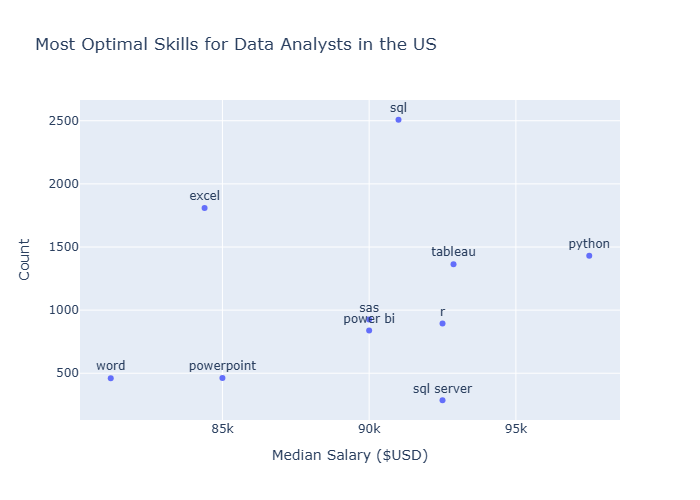

In [10]:
fig = px.scatter(
    skills,
    x = "median_salary",
    y = "skill_count",
    text = "job_skills",
    title = "Most Optimal Skills for Data Analysts in the US",
    labels = {
        "median_salary": "Median Salary ($USD)",
        "skill_count": "Count"
    }
)
fig.update_traces(textposition = "top center")

filename = "most_optimal_skills_us.png"
fig.write_image(filename)
display(Image(filename))